### lecture 10 - forecasting models

In [13]:
import pandas as pd
import numpy as np
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [14]:
df = pd.read_csv('./dataset/airline_passengers.csv',index_col='Month',parse_dates=True)

In [15]:
df.index.freq = 'MS'

In [16]:
df.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [17]:
df.tail()

,Thousands of Passengers
Month,
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390
1960-12-01,432


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Freq: MS
Data columns (total 1 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Thousands of Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


#### train and test set

In [19]:
train_data = df.iloc[:109]

In [20]:
test_data = df.iloc[108:]

#### model

In [22]:
fitted_model = ExponentialSmoothing(train_data['Thousands of Passengers'],
                                    trend='mul',
                                    seasonal='mul',
                                    seasonal_periods=12).fit()

c:\Users\adepa\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:84: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


#### predictions

In [23]:
test_predictions = fitted_model.forecast(36) # 12 periods into the future

In [25]:
test_predictions.head()

1958-02-01    339.142914
1958-03-01    399.281625
1958-04-01    394.233547
1958-05-01    402.545191
1958-06-01    473.128655
Freq: MS, dtype: float64

<Axes: xlabel='Month'>

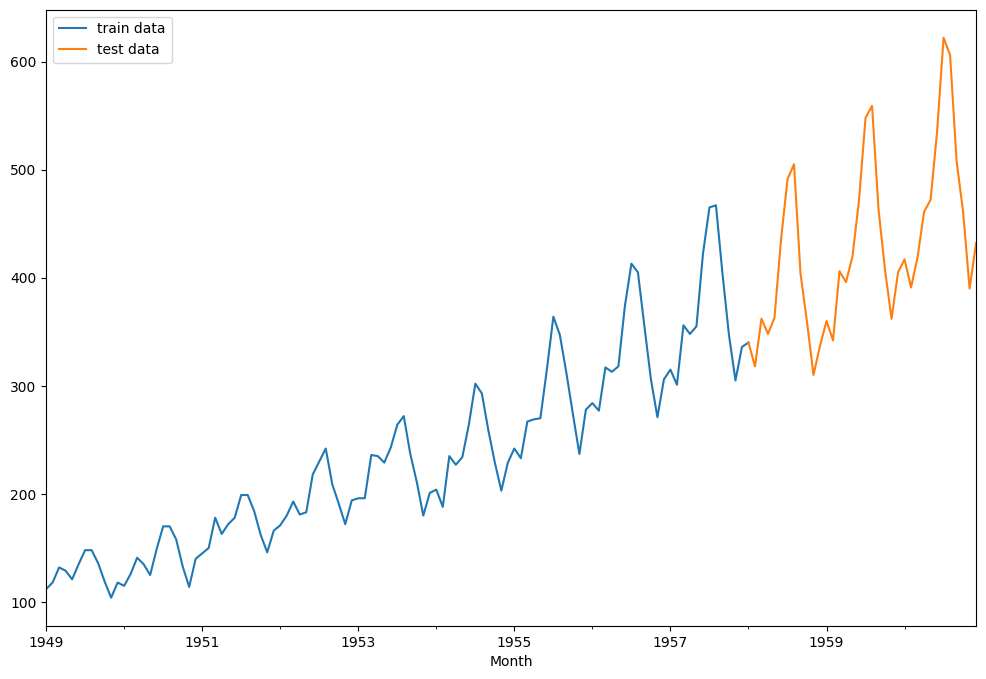

In [28]:
train_data['Thousands of Passengers'].plot(legend=True,label='train data',figsize=(12,8))
test_data['Thousands of Passengers'].plot(legend=True,label='test data',figsize=(12,8))

<Axes: xlabel='Month'>

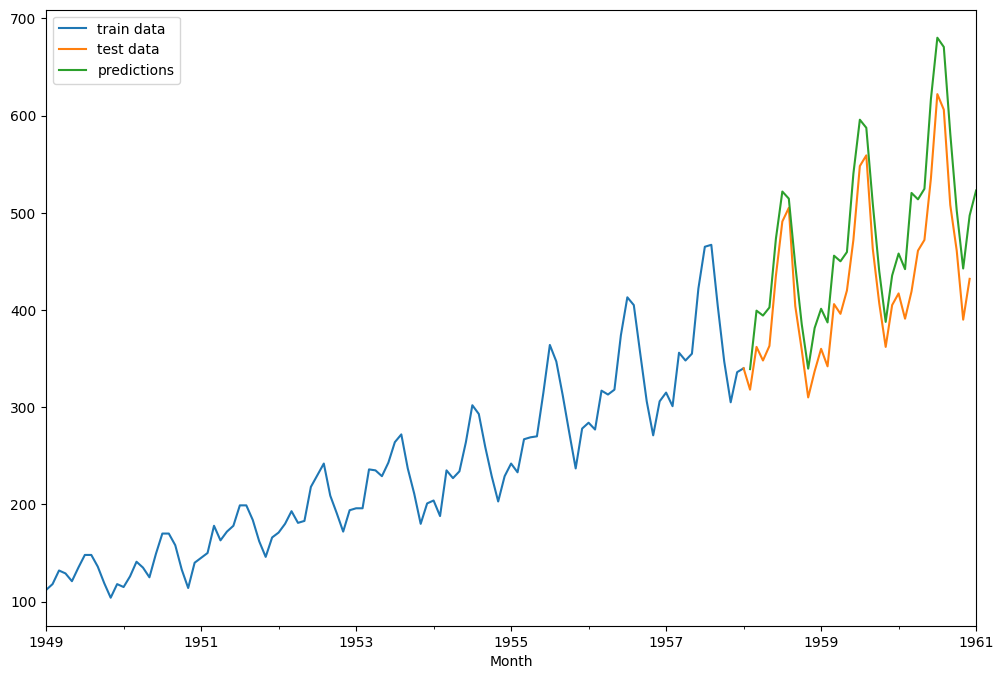

In [29]:
train_data['Thousands of Passengers'].plot(legend=True,label='train data',figsize=(12,8))
test_data['Thousands of Passengers'].plot(legend=True,label='test data',figsize=(12,8))
test_predictions.plot(legend=True,label='predictions')

<Axes: xlabel='Month'>

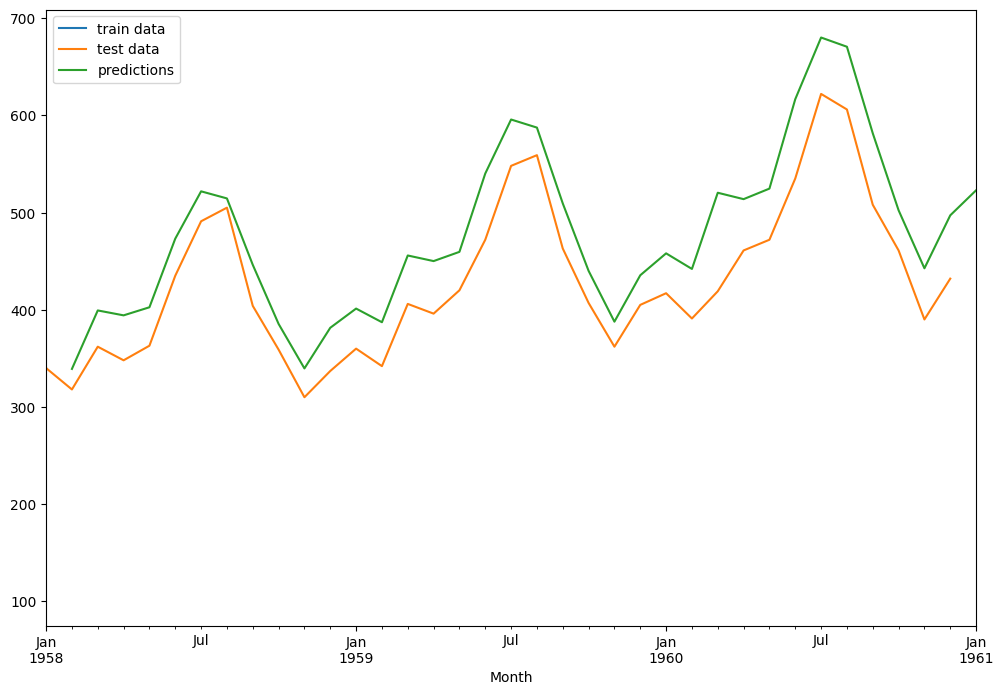

In [30]:
train_data['Thousands of Passengers'].plot(legend=True,label='train data',figsize=(12,8))
test_data['Thousands of Passengers'].plot(legend=True,label='test data',figsize=(12,8))
test_predictions.plot(legend=True,label='predictions',xlim=['1958-01-01','1961-01-01'])

#### evaluation metrics

* mean absolute error
* mean squared error
* root mean squared error